# Day 8

### Topics

1. Bit of a review: widgets & `ipywidgets.interact`
1. More about widgets
  * Bonus: Linking widgets
1. The NASA planet archive data
1. `bqplot` scatter plot dashboard with planet data

See extra notebook for more examples:
  * ~~Bonus: `bqplot` scatter plot dashboard with label & histogram~~
  * Bonus: `bqplot` heatmap dashboard with orbit generator using line plot



First, import our usual things:

In [1]:
import ipywidgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bqplot.pyplot as bplt

## Bit of a review

Last time we got into some interactivity with `ipywidgets` and the `interact` decorator:

There are a few ways we can use this library in a few ways, the first way is through something called a "decorator" that will decorate a function.  The syntax will look a little like:

```python
@decorator
def my_function():
    # stuff
...
```

This decorator is "decorating" the function like you'd put a hat to decorate your head -- it sits on top of the function and interacts only with this function.  Let's try a simple one to start -- print out a phrase from a list.

Let's sketch out what we want to do with code statically and build from there.  First, let's make something that prints a phrase:

In [2]:
print('Hi there!')

Hi there!


Now, let's make the actual phrase an input:

In [3]:
phrase = 'I am phrase.'

print(phrase)

I am phrase.


Now, let's make this into a function:

In [4]:
def my_phrase_print(phrase):
    print(phrase)

Let's use it a few times:

In [5]:
my_phrase_print('hi!')

hi!


In [6]:
my_phrase_print('hi hi!')
my_phrase_print('helooooooo!!')

hi hi!
helooooooo!!


Now let's decorate this function with the decorator `@ipywidgets.interact`:

In [7]:
@ipywidgets.interact(phrase='')
def my_phrase_print(phrase):
    print(phrase)

interactive(children=(Text(value='', description='phrase'), Output()), _dom_classes=('widget-interact',))

Whoa!  What did we just do!  We told `ipywidgets` that our phrase was going to be text input which it figured out by the default value we put in its definition AND that the input parameter `phrase` was going to be the one we wanted to change.  Let's try another.  Also note that when we ran this cell it called the function where before we would have to call the function after we declared it.


Let's say we want to only let our user put in a selected set of phrases from a list:

In [8]:
phrases_list = ['hi there!', 'I am phrase.', 'decorators decorate!']

We could do the same thing again but with this list:

In [9]:
@ipywidgets.interact(phrase=phrases_list)
def my_phrase_print(phrase):
    print(phrase)

interactive(children=(Dropdown(description='phrase', options=('hi there!', 'I am phrase.', 'decorators decorat…

Now we have a dropdown menu instead!  There are ways to choose what kinds of widgets we get (integer sliders, dropdown menus, text boxes), but here we are having `ipywidgets` basically figure it out for us on its own.

## More about widgets

But now, lets go into ipywidgets in a bit more detail and look at specific functions and call them directly from ipywidgets.

For example, we can create a little display that increments integer numbers:

In [10]:
itext = ipywidgets.IntText()
itext

IntText(value=0)

But what if that didn't display for you?  Depending on what version of jupyter notebook you have, you might have to use "display" to actually show your widgets.  

Try (uncommenting) the following:

In [11]:
#from IPython.display import display
#display(itext)

Still didn't work?  Try refreshing and/or restarting your notebook.

*Still* not working?  You might have to install the jupyter notebook widget extension:

In [12]:
#!jupyter nbextension enable --py widgetsnbextension

If you end up running the above cell (uncommented naturally!) then you might have to refresh or restart your jupyter notebook.

Moving on: 

The value of `itext` is then stored - so we could in theory generate a toggle and then do stuff with its value:

In [13]:
itext.value

0

Note if I go up and change the toggle value I have to re-run this cell to print out the newly stored value.

I can also set the value "by hand":

In [14]:
itext.value = 10

Once I run this cell, now the toggle values are updated above.

Let's try another one, how about an integer slider:

In [15]:
slider = ipywidgets.IntSlider(min=0, max=10, step=1)
slider

IntSlider(value=0, max=10)

We can also check out the value of the integer slider like with the integer text:

In [16]:
slider.value

0

Ok, so the slider slides, but other than changing the value next to it nothing happens!  We want to be able to change things in our code when the widget is moved around.

This is where this call back sort of thing comes into play.  Let's look at all the things associated with this Integer Slider object:

In [17]:
dir(slider)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_notifiers',
 '_call_widget_constructed',
 '_comm_changed',
 '_compare',
 '_cross_validation_lock',
 '_default_keys',
 '_display_callbacks',
 '_dom_classes',
 '_gen_repr_from_keys',
 '_get_embed_state',
 '_handle_custom_msg',
 '_handle_displayed',
 '_handle_msg',
 '_holding_sync',
 '_ipython_display_',
 '_is_numpy',
 '_lock_property',
 '_log_default',
 '_model_id',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_msg_callbacks',
 '_notify_trait',
 '_property_lock',
 '_register_validator',
 '_remove_notifiers',
 '_repr_keys',
 '_send',
 '_should_send_property

So, there is a lot of stuff here!  Let's focus on the `.observe` function:

In [18]:
slider.observe?

Ok, this has a lot of weird language about "callbacks" but the main translation of this is that this "observe" function is *observing* the slider widget object for a change and then doing something when that change happens.  Let's try associating a function to this.

We'll start by just printing out what that change is:

In [19]:
def print_slider(change):
    print(change)

Now we'll use this `.observe` function to observe for a change in the *value* of the integer slider.  Note that when we run this `.observe` we are "calling back" to our display of the integer slider above so we can actually just scroll up and it will print out what this change is.  Magic!!

In [20]:
slider.observe(print_slider, 'value')

We can also just re-display the slider as well:

In [21]:
slider

IntSlider(value=0, max=10)

Note that these two instances *of the same slider* are linked!  When one changes, so does the other one!  The print is only happening in the current "active" cell however.

So, what is this telling us, we'll we are getting a *dictionary* variable type back that gives us info of our change.  With a dictionary variable we access it like we accessed Pandas columns.  So, for example, let's re-write our function to print out the old and new values: 

In [22]:
def print_slider(change):
    print('old:', change['old'], 'new:', change['new']) # like accessing a column "old" and "new" in a Pandas dataframe

Let's make a new slider to use this function:

In [23]:
slider2 = ipywidgets.IntSlider(min=0, max=10, step=1)

And attach this new slider to this function:

In [24]:
slider2.observe(print_slider, 'value')

In [25]:
slider2

IntSlider(value=0, max=10)

Hey neat!  Ok, let's now link to widgets so when I mess with one, the other one changes.  In this sense the changes in the 2nd widget will be "driven" by the changes in the first.  You can actually link both ways but we'll just focus on the one way.

Let's make a label widget:

In [26]:
myLabel = ipywidgets.Label()
myLabel

Label(value='')

By default the label is just an empty string.  Let's set it to something:

In [27]:
myLabel.value = 'Hey Im like a string'

In [28]:
myLabel

Label(value='Hey Im like a string')

Ok, so now what we are going to do is make another slider widget and make it so that our label actually reflects the number of the slider.  

First, let's make another slider:

In [29]:
slider3 = ipywidgets.IntSlider(min=0, max=10, step=1)

Make our linking function but this time instead of printing out what old and new are, let's save it to our label's value:

In [30]:
def print_slider(change):
    #print('old:', change['old'], 'new:', change['new']) 
    myLabel.value = 'old: ' + str(change['old']) + ', new: ' + str(change['new'])

Link the slider:

In [31]:
slider3.observe(print_slider, 'value')

In [32]:
slider3

IntSlider(value=0, max=10)

In [33]:
myLabel

Label(value='Hey Im like a string')

Ok cool, but it would probably be nice to have them both show up displayed in the same cell.  We can do this with some of the layout widgets provided in `ipywidgets`:

In [34]:
ipywidgets.HBox([slider3, myLabel]) # H for horizontal

In [35]:
ipywidgets.VBox([slider3, myLabel])

So, now we have a little bit of practice with linking widgets!  Before using them with "real" data, we are going to take a look at the data we'll be using: the NASA planet arxiv data.

### BONUS/OPTIONAL: More with widgets

Check out the notebook for the dataviz course at UIUC: https://uiuc-ischool-dataviz.github.io/spring2020/week04/prep_notebook_week04.ipynb

## The NASA planet archive data

Let's start looking at the planet dataset.  If you have this file downloaded and stored in the same directory as this notebook we can take a quick peak at the first few lines of this file using our generic reading of files:

In [36]:
f = open('planets_2020.06.22_10.10.17.csv','r')
text = f.read()
f.close()

# print first few bits of text
print(text[0:50000])

# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
# Mon Jun 22 10:10:17 2020
#
# User preference: *
#
# CONSTRAINT:  where (pl_facility like 'Transiting Exoplanet Survey Satellite (TESS)')
#
# COLUMN pl_hostname:    Host Name
# COLUMN pl_letter:      Planet Letter
# COLUMN pl_name:        Planet Name
# COLUMN pl_discmethod:  Discovery Method
# COLUMN pl_controvflag: Controversial Flag
# COLUMN pl_pnum:        Number of Planets in System
# COLUMN pl_orbper:      Orbital Period [days]
# COLUMN pl_orbpererr1:  Orbital Period Upper Unc. [days]
# COLUMN pl_orbpererr2:  Orbital Period Lower Unc. [days]
# COLUMN pl_orbperlim:   Orbital Period Limit Flag
# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])
# COLUMN pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]
# COLUMN pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]
# COLUMN pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag
# COLUMN pl_orbeccen:    Eccentricity
# COLUMN pl_orbeccenerr

A few things to note:
1. There is a lot of text before the actual column names appear & this text is denoted with a "#"
1. This text is actually useful!  It gives us the descriptions of each column!  

So, the first thing we want to do is read this thing in, but be careful to tell Pandas to "ignore" everything that is a line with a "#".  Also, we'll be sure to tell Pandas to treat "," as the seperator for our columns:

In [37]:
planets = pd.read_csv('https://jnaiman.github.io/csci-p-14110_su2020/lesson08/planets_2020.06.22_10.10.17.csv', 
                     sep=",", comment="#")

Let's take a quick look:

In [38]:
planets

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
0,1,11 Com,b,11 Com b,Radial Velocity,0,1,326.030000,0.320000,-0.320000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,2,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.219970,3.200000,-3.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,3,14 And,b,14 And b,Radial Velocity,0,1,185.840000,0.230000,-0.230000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,4,14 Her,b,14 Her b,Radial Velocity,0,1,1773.400020,2.500000,-2.500000,...,0.537,0.001,0.0,0.366,0.002,0.0,0.438,0.006,0.0,9.0
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.500000,1.000000,-1.000000,...,0.418,0.003,0.0,0.222,0.003,0.0,0.351,0.003,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,4160,tau Gem,b,tau Gem b,Radial Velocity,0,1,305.500000,0.100000,-0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4160,4161,ups And,b,ups And b,Radial Velocity,0,3,4.617033,0.000023,-0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4161,4162,ups And,c,ups And c,Radial Velocity,0,3,241.258000,0.064000,-0.064000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4162,4163,ups And,d,ups And d,Radial Velocity,0,3,1276.460000,0.570000,-0.570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


Let's make a few quick plots of the distributions of the semi-major axis & eccentricities of these planets.

First, semi-major axis.  If we look at our comments above, we see this is delinated by the column `pl_orbsmax`. Let's make a quick histogram:

/opt/anaconda3/envs/myNewEnv2/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/myNewEnv2/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


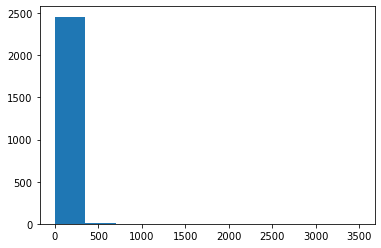

In [39]:
#planets.plot(y='pl_orbsmax', kind='hist')
fig, ax = plt.subplots(1,1)
ax.hist(planets['pl_orbsmax'])
plt.show()

Hmmm, maybe with a log scale?

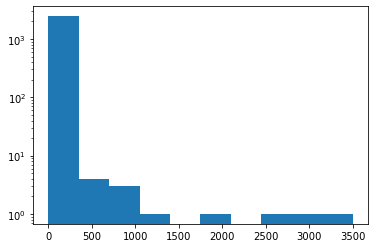

In [40]:
#planets.plot(y='pl_orbsmax', kind='hist', logy=True)
fig, ax = plt.subplots(1,1)
ax.hist(planets['pl_orbsmax'])
ax.set_yscale('log')
plt.show()

Not quite able to see interesting stuff, let's try zooming in:

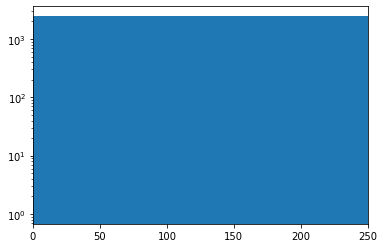

In [41]:
#planets.plot(y='pl_orbsmax', kind='hist', logy=True, xlim=(0,250))
fig, ax = plt.subplots(1,1)
ax.hist(planets['pl_orbsmax'])

ax.set_yscale('log')
ax.set_xlim(0,250)

plt.show()

And explicitly setting the bins:

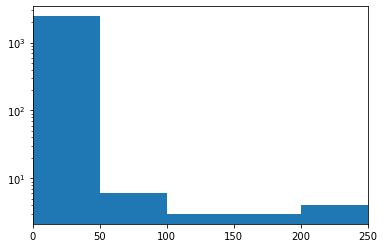

In [42]:
#planets.plot(y='pl_orbsmax', kind='hist', logy=True, xlim=(0,500), bins=[0,50,100,150,200,250])
fig, ax = plt.subplots(1,1)
ax.hist(planets['pl_orbsmax'], bins=[0,50,100,150,200,250])

ax.set_yscale('log')
ax.set_xlim(0,250)

plt.show()

Ok so we see a range of semi-major axis between a few and 3500 AU (distance between Earth and Sun), but really centered around 0-50.

Let's also try eccentricity which is listed as `pl_orbeccen`:

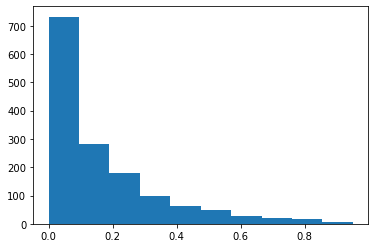

In [43]:
#planets.plot(y='pl_orbeccen', kind='hist')
fig, ax = plt.subplots(1,1)
ax.hist(planets['pl_orbeccen'])

plt.show()

From this we've learned that most of the planets have semi-major axis between a few and maybe 100 AU and eccentricities are from 0 (circular) to ~0.8.

## `bqplot` interactive scatter plot

Now that we have our data we are going to build a "dashboard" with it.  This will be very similar to what we've already done with linking the integer slider with the label widgets.

First, we're going to use bqplot's matplotlib-like interface to make a scatter plot of the two parameters we were looking at above.  A lot of the calls will look *similar* to matplotlib by a little different.

In [44]:
fig = bplt.figure(padding_y=0.0) # set up a figure object

scatter_plot = bplt.scatter(planets['pl_orbsmax'], planets['pl_orbeccen'])

fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

### What if my scatter plot is slow?  Downsampling to the rescue!

Sometimes when we are working on a plot, we don't want to use all of the data, we want to use a subset to speed up our calculations.  We can do this with another NumPy function that will choose a random set of indicies to grab data with:

In [45]:
nsamples = 100 # let's choose 100 random samples
randomIndexes = np.random.choice(range(len(planets)-1),nsamples,replace=False)
# replace = False just means we don't want to double count indexes

In [46]:
randomIndexes # yours might be different!

array([3972,  534, 1355, 2783,  513,  457,  627, 2138, 3786, 1387, 2419,
       2654, 1307, 2168, 1614, 1589,  818, 1225, 1885, 1830, 1755, 1819,
         71, 2206, 3107, 3604,  291, 3470,  339, 2205,  865, 3919, 3147,
       2957, 2175,  497, 2137, 1385,  624, 2517,  539, 3641, 3219,  714,
       3545, 3083, 1290, 1059, 3057, 2359,  981, 2223, 3353, 3784, 1070,
       1416, 2386, 4085,  370, 1972, 3175, 2262, 1554, 3701, 1183, 1065,
       1409, 2529,  361,  467, 1218,  232, 2604,  576, 1735,  498,  437,
       3033,  255, 1807, 2844, 1785,  682, 3653, 2620, 3975, 3851, 1178,
       1082, 3958,  247, 2350,  880, 1077, 1560, 1452, 3704, 2777,  850,
       3435])

Now, we can make a downsampled version of planets:

In [47]:
planetsDS = planets.iloc[randomIndexes]

In [48]:
planetsDS

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
3972,3973,WASP-140,b,WASP-140 b,Transit,0,1,2.235984,8.000000e-07,-8.000000e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
534,535,HD 158996,b,HD 158996 b,Radial Velocity,0,1,820.200000,1.400000e+01,-1.400000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1355,1356,KELT-6,b,KELT-6 b,Transit,0,2,7.845700,2.000000e-04,-2.000000e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2783,2784,Kepler-341,c,Kepler-341 c,Transit,0,4,8.010410,4.900000e-05,-4.900000e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
513,514,HD 15337,b,HD 15337 b,Transit,0,2,4.756150,1.700000e-04,-1.700000e-04,...,0.510,0.002,0.0,0.416,0.003,0.0,0.303,0.005,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,Kepler-103,c,Kepler-103 c,Transit,0,2,179.612000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3704,3705,Kepler-980,b,Kepler-980 b,Transit,0,1,11.551025,2.754000e-05,-2.754000e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2777,2778,Kepler-339,c,Kepler-339 c,Transit,0,3,6.988055,5.300000e-05,-5.300000e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
850,851,HD 69830,c,HD 69830 c,Radial Velocity,0,3,31.560000,4.000000e-02,-4.000000e-02,...,0.461,0.002,0.0,0.291,0.003,0.0,0.318,0.006,0.0,22.0


In [49]:
bplt.figure() # we have to explicitly make a figure object

bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'])

bplt.xlim(0, 25)

bplt.show()

Note, now we have the ability to zoom and pan!

We can also do this with making figure "objects" like we did before:

In [50]:
fig = bplt.figure()

scatter = bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'])
bplt.xlim(0,20)

fig

Figure(axes=[Axis(scale=LinearScale(max=20.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale())], f…

So, that is all well and good, but we want this to be interactive!  Like using "dir" before, we can have a simplified look at what is available for use to mess around with in the scatter plot:

In [51]:
scatter.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'color',
 'colors',
 'default_opacities',
 'default_size',
 'default_skew',
 'display_legend',
 'display_names',
 'drag_color',
 'drag_size',
 'enable_delete',
 'enable_hover',
 'enable_move',
 'fill',
 'hovered_point',
 'hovered_style',
 'interactions',
 'labels',
 'marker',
 'names',
 'names_unique',
 'opacity',
 'preserve_domain',
 'restrict_x',
 'restrict_y',
 'rotation',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'size',
 'skew',
 'stroke',
 'stroke_width',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unhovered_style',
 'unselected_style',
 'update_on_move',
 'visible',
 'x',
 'y']

The `interactions` looks like something we want.  We could look through the docs on this, or you can just believe me that there is an interaction that we can add that selects points on a mouse click:

In [52]:
fig = bplt.figure()

scatter = bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'], 
                       interactions={'click':'select'})
bplt.xlim(0,20)

fig

Figure(axes=[Axis(scale=LinearScale(max=20.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale())], f…

Hmm, it looks like nothing happens when I click on buttons.  This is because we have not specified that we want something to happen to the points when we click on them.  Let's set the interior of the points to red on a click:

In [53]:
fig = bplt.figure()

scatter = bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'], 
                       interactions={'click':'select'}, 
                       selected_style={'fill':'red'})
bplt.xlim(0,20)

fig

Figure(axes=[Axis(scale=LinearScale(max=20.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale())], f…

Hey neat!  So, how do we "tell" what is selected on our plot?  We can look at the `.selected` associated with our `scatter` variable:

In [54]:
scatter.selected

array([92], dtype=uint32)

And this gives us a way to look and see info about what data was collected:

In [55]:
planetsDS.iloc[scatter.selected]

,rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn
880,881,HD 81817,b,HD 81817 b,Radial Velocity,0,1,1047.1,8.5,-8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


So let's now make a label and set its value to something else about this data, like the place it was discovered or `pl_facility`.

First, let's get out the correct value for a row based on whatever is selected:

In [56]:
planetsDS.iloc[scatter.selected]['pl_facility']

880    Bohyunsan Optical Astronomical Observatory
Name: pl_facility, dtype: object

And to make sure its as a string:

In [57]:
planetsDS.iloc[scatter.selected]['pl_facility'].values

array(['Bohyunsan Optical Astronomical Observatory'], dtype=object)

In [58]:
planetsDS.iloc[scatter.selected]['pl_facility'].values[0]

'Bohyunsan Optical Astronomical Observatory'

In [59]:
planetLabel = ipywidgets.Label()
planetLabel.value = planetsDS.iloc[scatter.selected]['pl_facility'].values[0]
planetLabel

Label(value='Bohyunsan Optical Astronomical Observatory')

Now if we go back and select a different point, we see that we get a different observatory.  *BUT* we also note that we have to re-run the cells in order for the label value to print out its update.  So, like before, our final step is to link the change in the selection point to an update in the label.  

Like before, let's start with a function that will track this.  Let's first just what happens:

In [60]:
def on_selection(change):
    print(change)
    
scatter.observe(on_selection, 'selected')

Let me re-plot the figure:

In [61]:
fig

Figure(axes=[Axis(scale=LinearScale(max=20.0, min=0.0), side='bottom'), Axis(orientation='vertical', scale=Lin…

Ok, on selection, we see something similar to what we had before but wiht more details, but we have a 'new' and an 'owner' and things like this.  Let's make our "on select" function more complicated.  I'm going to put the fig generation & the function calls all in the same cell so we can keep track of what is going on a bit better:

In [62]:
# construct the figure
fig = bplt.figure()
scatter = bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'], 
                       interactions={'click':'select'}, 
                       selected_style={'fill':'red'})
bplt.xlim(0,20)

# construct selection call back
def on_selection(change):
    #print(change)
    print(change['new'])
    
# link the call back
scatter.observe(on_selection, 'selected')

# display the figure
fig

Figure(axes=[Axis(scale=LinearScale(max=20.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale())], f…

So now we want to instead of printing this number, use it to change the value of our print label, so let's update our on-selection function for this:

In [63]:
# construct the figure
fig = bplt.figure()
scatter = bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'], 
                       interactions={'click':'select'}, 
                       selected_style={'fill':'red'})
bplt.xlim(0,20)

# construct selection call back
def on_selection(change):
    #print(change)
    #print(change['new'])
    #planetLabel.value = planets.iloc[scatter.selected]['pl_facility'].values[0]
    planetLabel.value = planetsDS.iloc[change['new']]['pl_facility'].values[0] #changed

# link the call back
scatter.observe(on_selection, 'selected')

# display the figure
fig

Figure(axes=[Axis(scale=LinearScale(max=20.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale())], f…

In [64]:
planetLabel

Label(value='Bohyunsan Optical Astronomical Observatory')

Last but not least, we'll use our `VBox` again to place the label right on top of the plot:

In [65]:
# construct the figure
fig = bplt.figure()
scatter = bplt.scatter(planetsDS['pl_orbsmax'], planetsDS['pl_orbeccen'], 
                       interactions={'click':'select'}, 
                       selected_style={'fill':'red'})
bplt.xlim(0,20)

# construct selection call back
def on_selection(change):
    #print(change)
    #print(change['new'])
    #planetLabel.value = planets.iloc[scatter.selected]['pl_facility'].values[0]
    planetLabel.value = planetsDS.iloc[change['new']]['pl_facility'].values[0] #changed

# link the call back
scatter.observe(on_selection, 'selected')

# display the figure
ipywidgets.VBox([planetLabel,fig])

And that is it!  We have a dashboard that links multiple columns of our dataset!